In [13]:
# Importar as bibliotecas

import datetime
import json
import os
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Trazer as opções de configuração do JSON

json_file = os.path.abspath('../options.json')

with open(json_file, 'r', encoding='utf-8') as j_file:
    json_data = json.load(j_file)

In [15]:
# Chamada dos arquivos

archive_dir = os.path.abspath('../data')

cvm_dir = os.path.join(archive_dir, 'cvm')
cdi_dir = os.path.join(archive_dir, 'cdi')

cvm_dir_processed = os.path.join(cvm_dir, json_data['DIR']['CVM']['DATA_NAME'])

In [16]:
# Gráfico de evolução do preço das cotas

print

cvm_files = os.listdir(cvm_dir_processed)
all_data = []

DATE_START = json_data['CONFIG']['START_DATE']
DATE_END = json_data.get("CONFIG", False).get("END_DATE", False) or str(datetime.date.today())

for investment_file in cvm_files:
    investment_path = os.path.join(cvm_dir_processed, investment_file)
    investment = pandas.read_csv(investment_path, sep=';', encoding='utf-8')

    investment = investment.query('@DATE_START <= DT_COMPTC <= @DATE_END')

    print(investment)
    investment = investment[['DT_COMPTC', 'VL_QUOTA', 'NOME_FUNDOS', 'CNPJ_FUNDO_CLASSE']].copy()
    all_data.append(investment)

investments = pandas.concat(all_data, ignore_index=True)
investments['DT_COMPTC'] = pandas.to_datetime(investments['DT_COMPTC'])
investments = investments.sort_values('DT_COMPTC')

      CNPJ_FUNDO_CLASSE                   NOME_FUNDOS   DT_COMPTC  VL_QUOTA  \
0    52.324.414/0001-70  Absolute Delfos FIC FI RF LP  2025-02-03  1.186943   
1    52.324.414/0001-70  Absolute Delfos FIC FI RF LP  2025-02-04  1.187603   
2    52.324.414/0001-70  Absolute Delfos FIC FI RF LP  2025-02-05  1.188511   
3    52.324.414/0001-70  Absolute Delfos FIC FI RF LP  2025-02-06  1.188841   
4    52.324.414/0001-70  Absolute Delfos FIC FI RF LP  2025-02-07  1.189562   
..                  ...                           ...         ...       ...   
248  52.324.414/0001-70  Absolute Delfos FIC FI RF LP  2026-01-28  1.366379   
249  52.324.414/0001-70  Absolute Delfos FIC FI RF LP  2026-01-29  1.367117   
250  52.324.414/0001-70  Absolute Delfos FIC FI RF LP  2026-01-30  1.367837   
251  52.324.414/0001-70  Absolute Delfos FIC FI RF LP  2026-02-02  1.368640   
252  52.324.414/0001-70  Absolute Delfos FIC FI RF LP  2026-02-03  1.370362   

     VALUATION_PERCENT      VL_TOTAL  VL_PATRIM_LIQ

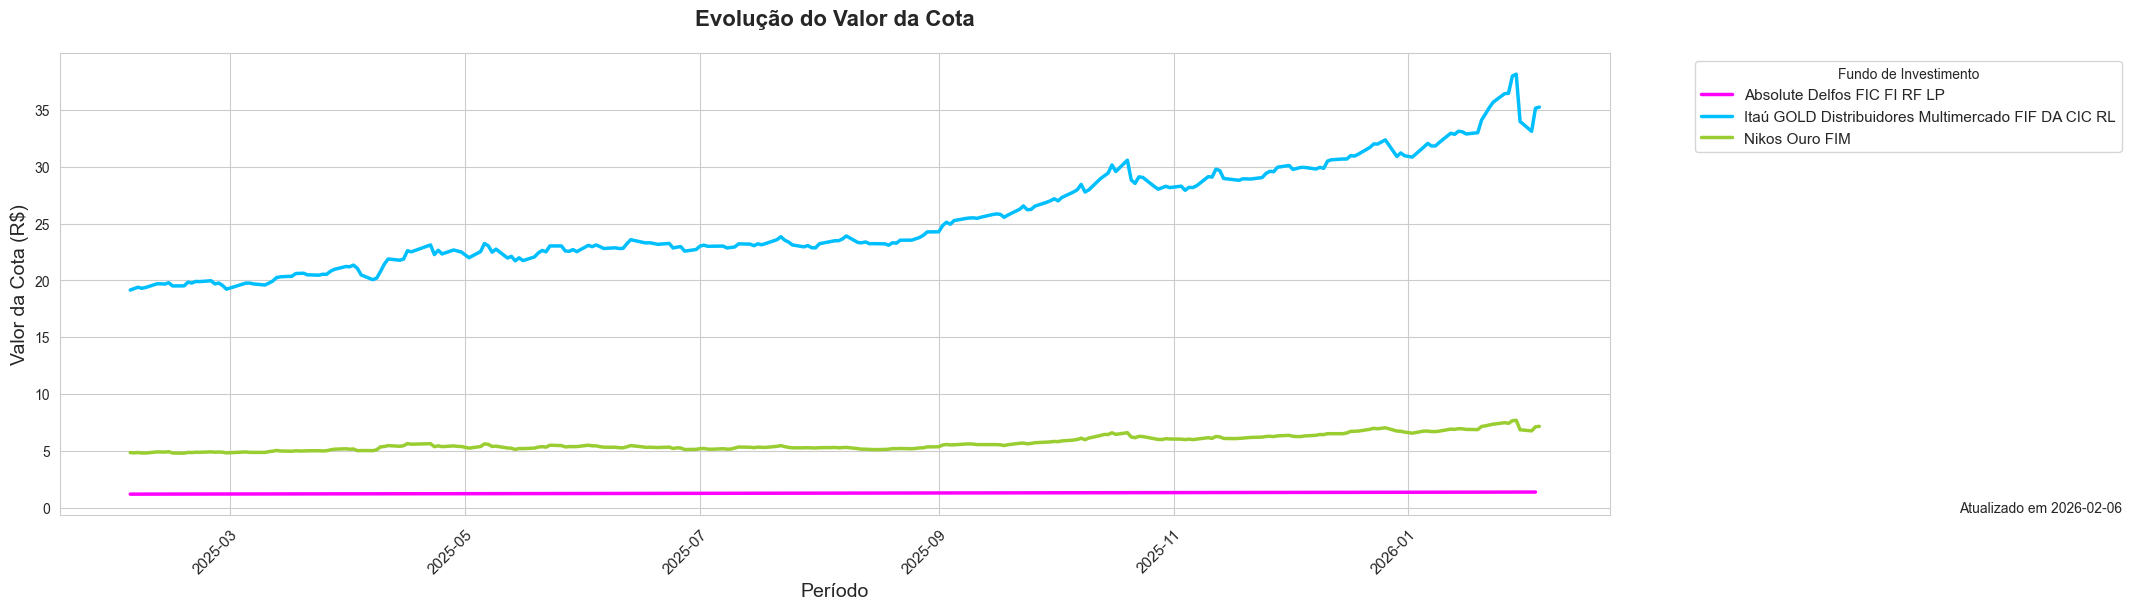

In [17]:
# Gráfico de evolução do preço das cotas

sns.set_style("whitegrid")
plt.figure(figsize=(20, 6))

plot = sns.lineplot(
    data=investments, 
    x='DT_COMPTC', 
    y='VL_QUOTA', 
    hue='NOME_FUNDOS', 
    palette=['magenta', 'deepskyblue', 'yellowgreen'],
    linewidth=2.5
)

plt.title("Evolução do Valor da Cota", fontsize=16, fontweight='bold', pad=20)
plt.text(
    1.225, 0.0,
    "Atualizado em " + str(datetime.datetime.today().date()), 
    transform=plt.gca().transAxes, 
    fontsize=10, 
    va='bottom', ha='left'
)

plt.xlabel("Período", fontsize=14)
plt.ylabel("Valor da Cota (R$)", fontsize=14)
plt.xticks(
    rotation=45, 
    fontsize=11,
    ha='right',
    rotation_mode= 'anchor'
)
plt.legend(
    title='Fundo de Investimento', 
    bbox_to_anchor=(1.05, 1), 
    fontsize=11
)

plt.gca().tick_params(axis='x', pad=5)
plt.show()


In [18]:
def valuation_comparable():
    cvm_list = json_data['GRAPHIC']['INVESTMENT_LIST']
    metric_list = json_data['GRAPHIC']['METRICS_LIST']

    for 


SyntaxError: invalid syntax (3195862892.py, line 5)

['Absolute_Delfos_FIC_FI_RF_LP.csv', 'Itaú_GOLD_Distribuidores_Multimercado_FIF_DA_CIC_RL.csv', 'Nikos_Ouro_FIM.csv']
